# **Project: Insurance Cost Analysis**

In this project, we will perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, we will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:
* `skillsnetwork` to download the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import pyarrow as pa
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split


Matplotlib is building the font cache; this may take a moment.



load the dataset to this lab environment.


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [5]:
await download(filepath, "insurance.csv")
file_name="insurance.csv"

In [6]:
df = pd.read_csv(file_name)

In [7]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
#df = pd.read_csv(filepath, header=None)


Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [8]:
df = pd.read_csv(file_name, header = None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


Add the headers to the dataframe, as mentioned in the project scenario. 


In [9]:
df.columns = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']

Now, replace the '?' entries with 'NaN' values.


In [10]:
df.replace('?', np.nan, inplace= True   )

Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB
None


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [12]:
mn = df['age'].astype('float').mean()
df['age'] =  df['age'].replace(np.nan, mn)

md = df['smoker'].value_counts().idxmax()
df['smoker'] = df['smoker'].replace(np.nan, md)

Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places.


In [13]:
df['charges'] = round( df['charges'] , 2 )


Implement the regression plot for `charges` with respect to `bmi`. 


<Axes: xlabel='bmi', ylabel='charges'>

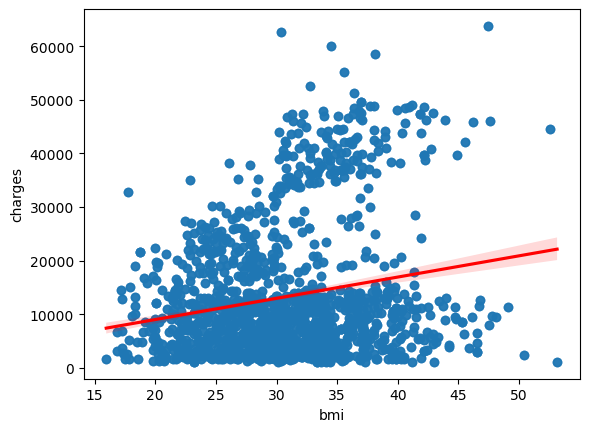

In [14]:
sns.regplot( x= 'bmi', y='charges', data = df, line_kws={"color": "red"} )

Implement the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='smoker', ylabel='charges'>

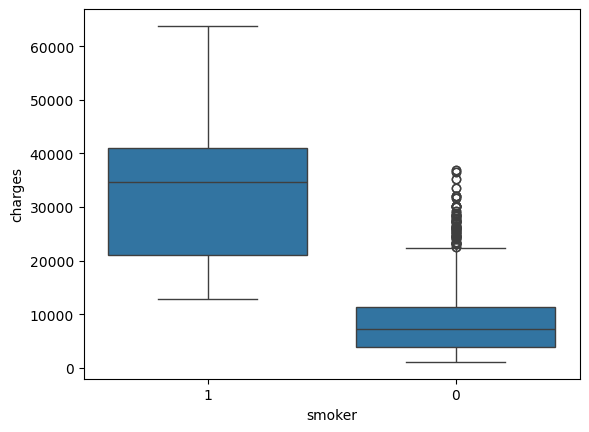

In [15]:
sns.boxplot( x = 'smoker', y='charges', data = df )

Print the correlation matrix for the dataset.


In [16]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000



Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [17]:
slr = LinearRegression()
x_data_slr = df[['smoker']]
y = df['charges']
slr.fit(x_data_slr, y)
slr.score( x_data_slr, y )

0.6221791733924185

Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [18]:
x_data_mlr = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
mlr = LinearRegression()
mlr.fit( x_data_mlr , y ) 
mlr.score(x_data_mlr , y )

0.7504063772187107

Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [19]:
ops = [('scale', StandardScaler()), ('features', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline( ops )
x_data_mlr = x_data_mlr.astype('float')
pipe.fit( x_data_mlr, y )
yhat_pipe = pipe.predict( x_data_mlr )
#pipe.score( x_data_mlr, y )
r2_score(  y, yhat_pipe )

0.8452558518297514


Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data_mlr , y , test_size=0.2, random_state = 0)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [21]:
rr = Ridge( alpha = 0.1 )
rr.fit( x_train, y_train )
rr.score( x_test, y_test )

0.7469826011339449

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [22]:
pr = PolynomialFeatures( degree = 2 )
x_rr_pr_train = pr.fit_transform( x_train )
x_rr_pr_test = pr.transform( x_test )

rr.fit( x_rr_pr_train, y_train )
rr.score( x_rr_pr_test, y_test )

0.8409973229754971

Now we will use GridSearchCV to find the best possible hyperparameters and degree of a model for the best fit.

In [28]:
#we will create a pipeline with a ridge model in it
from sklearn.model_selection import GridSearchCV
alp = np.arange( 1, 100, 1 ).tolist()
deg = np.arange( 1, 5, 1 ).tolist() 

ri = [ ('scale', StandardScaler()), ( 'features', PolynomialFeatures(include_bias = False) ), ( 'ridge', Ridge() ) ]

Pi_ri = Pipeline(ri)

param = [{'ridge__alpha':alp, 'features__degree':deg}]

g = GridSearchCV( Pi_ri , param,  cv = 5 )
g.fit( x_data_mlr, y)
g_best = g.best_estimator_



In [29]:
g_best.score( x_test, y_test )

0.8604241751591211